## Regresion lineal con TensorFlow

La regersio lineal es un metodo estadístico muy comun que nos permite aprender una funcion o relacion dado un conjunto de datos continuos. Done dado un "x" tiene su correspondiente "y", y nosotros debemos aprender la relacion entre estos dos, lo cual lo llamamos hipotesis.

En el caso de la regresion lineal, la hipotesis es:

<b>h=wx+b</b>

Donde:
* w son los pesos
* b es el bias
* Ambos son parametros del modelo

Todo lo que necesitamos es estimar el valor de w y b de un dataset dado, donde la hipotesis produce el menor costo posible  (J), el cual esta definido por la funcion de coste (cost function):

J(w,b) = (1/2m)*(sumatoria_empezando en 1 hasta m(y_original - y_predicho)^2)

Donde m es el numero de datos en el dataset, esta funcion de coste es tambien llamado **Mean Squared Error**

Para encontrar el valor optimizado de los parametros donde J es minimo, podemos usar el algoritmo Gradiente Descendiente, acá el pseudocodigo:


<br>Repetir hasta la convergencia{
<br>    w = w - alfa*(delta(J)/delta(w))
<br>    b = b - alfa*(delta(J)/delta(b))
<br>}


Donde:
alfa: es un hiperparametro llamado el learning rate

### Hacemos uso de TensorFlow

In [4]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
tf.__version__

'1.14.0'

In [7]:
#iniciamos seeds para hacer que los numeros randomicos sean previsibles
np.random.seed(101)
tf.set_random_seed(101)

In [8]:
#Generamos datos randomicos para el entrenamiento del modelo de regresion lineal
x = np.linspace(0,50,50) + np.random.uniform(-4,4,50)
y = np.linspace(0,50,50) + np.random.uniform(-4,4,50)


In [9]:
x

array([ 0.13118902,  1.58574886, -1.73138986,  0.43339774,  5.56384851,
        7.77321572,  4.57817874, 10.29176178,  9.9356162 ,  6.7031851 ,
       10.63790236, 10.04154543,  9.70003718, 15.55012022, 18.00958007,
       13.16495174, 12.99502208, 18.17532615, 20.199289  , 17.59766573,
       21.8906139 , 21.57151122, 18.83685589, 20.57234166, 21.98553533,
       29.46474729, 26.69593542, 28.18133669, 30.44998104, 29.92753091,
       33.91747336, 34.09601427, 31.87704387, 32.53126413, 38.31689127,
       34.46333834, 39.65549241, 40.39732374, 39.0808018 , 43.17567335,
       37.59349837, 38.65951464, 44.46920122, 47.00138997, 42.17444159,
       44.12294771, 48.31870775, 45.27360867, 50.59056093, 49.90108178])

In [10]:
y

array([ 1.44542215,  1.1927937 , -1.61201012,  0.85271732,  4.68327335,
        2.0655101 ,  6.12338269,  4.24693369,  4.58573251,  6.60988885,
        9.74302668, 14.24518839, 15.83901099, 13.09064546, 13.97466902,
       16.4044347 , 14.92339458, 14.28756352, 14.77615491, 20.48902432,
       22.90629042, 22.79065479, 23.66312122, 22.8659393 , 25.74255861,
       23.18349607, 27.8100084 , 27.7880076 , 30.55959153, 26.34189158,
       32.8884197 , 33.13058936, 34.2136892 , 33.64840154, 38.49676657,
       33.34250668, 35.12685715, 35.57634918, 35.16086129, 43.02768923,
       37.45715484, 42.69446487, 43.90391649, 42.90108648, 41.00388727,
       48.65612264, 46.01827748, 48.37251043, 50.66389696, 51.40223081])

In [12]:
#numero de elementos 
n = len(x)
print(n)

50


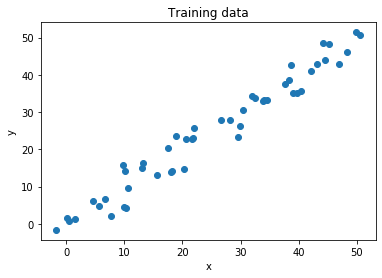

In [13]:
#Visualizamos los datos
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Training data')
plt.show()

In [14]:
'''
Empezamos a crear el modelo definiendo 'x' y 'y' como placeholders, los cuales usaran 
para el optimizador durante el proceso de entrenamiento
'''

X = tf.placeholder('float')
Y = tf.placeholder('float')

In [15]:
'''
Ahora declaramos dos Variables tensorflow entrenables 
para los pesos y el bias, los inicializaremos usando np.random.randn
'''

W = tf.Variable(np.random.randn(), name = 'W')
b = tf.Variable(np.random.randn(), name = 'b')

In [24]:
W

<tf.Variable 'W:0' shape=() dtype=float32_ref>

In [25]:
b

<tf.Variable 'b:0' shape=() dtype=float32_ref>

In [16]:
'''
definimos los hiperparametros del modelo, learning rate y epoch
'''
learning_rate = 0.01
training_epochs = 1000

In [17]:
'''
Ahora crearemos la hipotesis, la funcion de coste y el optimizador
No se hara la gradiente descendiente de cero, ya que tf ya lo tiene
despus se inicializaran las variables
'''
#hipotesis
y_pred = tf.add(tf.multiply(X,W),b) #multiplicamos X y W, luego sumamos b


#cost function (mean squared error)
cost = tf.reduce_sum(tf.pow(y_pred-Y,2))/ (2*n)

#Optimizador de gradiente descendiente
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

#inicializamos las variables globales
init = tf.global_variables_initializer()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [32]:
'''
Ahora realizaremos el proceso de entrenamiento dentro de una sesion TensorFlow
'''

with tf.Session() as sess:
    
   #inicializamos las variables
    sess.run(init)
    
    #lo iteramos haciendo uso de los epochs
    for epoch in range(training_epochs):
        
        #alimentamos cada punto de datos en el optimizador
        for(_x,_y) in zip(x,y):
            sess.run(optimizer, feed_dict={X:_x,Y:_y})

        #se despliega el resultado despues de iterarlo en 50 epochs
        if (epoch+1)% 50 == 0:
            #calculamos el costo en cada epoch 
            c = sess.run(cost, feed_dict = {X:x, Y:y}) 
            print('Epoch', (epoch+1),': cost = ',c,'W = ',sess.run(W),'b=',sess.run(b))
        
    #Guardamos los valores necesarios para ser usados fuera de la sesion
    training_cost = sess.run(cost,feed_dict={X:x,Y:y})
    weight = sess.run(W)
    bias = sess.run(b)

Epoch 50 : cost =  5.8868036 W =  0.9951241 b= 1.238105
Epoch 100 : cost =  5.79127 W =  0.99812365 b= 1.0914395
Epoch 150 : cost =  5.7119684 W =  1.0008028 b= 0.96044284
Epoch 200 : cost =  5.6459413 W =  1.0031956 b= 0.84343934
Epoch 250 : cost =  5.5907993 W =  1.0053328 b= 0.7389355
Epoch 300 : cost =  5.544608 W =  1.007242 b= 0.6455921
Epoch 350 : cost =  5.5057893 W =  1.008947 b= 0.56221986
Epoch 400 : cost =  5.473066 W =  1.01047 b= 0.48775342
Epoch 450 : cost =  5.445385 W =  1.0118302 b= 0.42124158
Epoch 500 : cost =  5.4219036 W =  1.0130452 b= 0.36183482
Epoch 550 : cost =  5.4019227 W =  1.0141305 b= 0.30877408
Epoch 600 : cost =  5.3848557 W =  1.0150996 b= 0.2613811
Epoch 650 : cost =  5.370246 W =  1.0159653 b= 0.21905078
Epoch 700 : cost =  5.3576994 W =  1.0167387 b= 0.18124203
Epoch 750 : cost =  5.3468933 W =  1.0174294 b= 0.14747237
Epoch 800 : cost =  5.337558 W =  1.0180461 b= 0.11730931
Epoch 850 : cost =  5.3294754 W =  1.0185971 b= 0.090368524
Epoch 900 : c

In [33]:
predictions = weight * x + bias
print('Training_cost =', training_cost, 'Weight =',weight, 'bias =',bias)

Training_cost = 5.3110332 Weight = 1.0199214 bias = 0.02561658


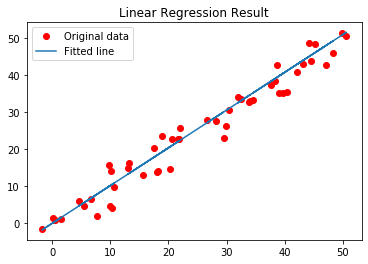

In [34]:
plt.plot(x,y,'ro',label='Original data')
plt.plot(x,predictions,label='Fitted line')
plt.title('Linear Regression Result')
plt.legend()
plt.show()